In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family='Malgun Gothic')
filename = './../data/mpg.csv'
plt.style.use('ggplot') # 'ggplot' 형식의 스타일을 사용합니다.
# plt.style.use('Solarize_Light2')

In [3]:
print('스타일 목록')
print(plt.style.available)

스타일 목록
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
mpg = pd.read_csv(filename, encoding='utf-8')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [6]:
xdata = mpg.loc[:, ['displ']]
ydata = mpg.loc[:, ['hwy']]

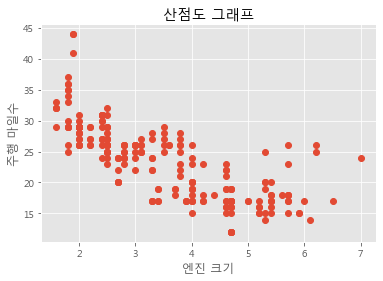

In [7]:
plt.figure()
plt.plot(xdata, ydata, marker='o', linestyle='None' )
plt.xlabel("엔진 크기")
plt.ylabel("주행 마일수")
plt.title("산점도 그래프")
plt.grid(True)

In [8]:
mycolors = ['r', 'g', 'b'] # 항목을 구분한 색상 리스트

In [9]:
# 해당 구동 방식을 한글 이름으로 변경하기 위한 사전
label_dict = {'f':'전륜 구동', '4':'사륜 구동', 'r':'후륜 구동'}

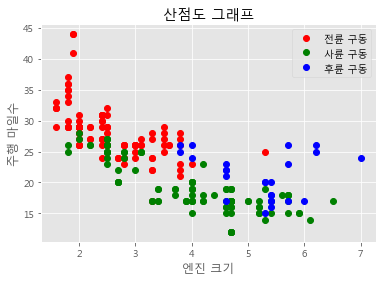

In [10]:
plt.figure()

idx = 0 # 색상 구분을 위한 카운터 변수
labels = mpg['drv'].unique() # ['f' '4' 'r']

for finditem in labels:
    xdata = mpg.loc[mpg['drv'] == finditem, 'displ']
    ydata = mpg.loc[mpg['drv'] == finditem, 'hwy']
    plt.plot(xdata, ydata, color=mycolors[idx], marker='o', linestyle='None', label=label_dict[finditem])
    idx += 1

plt.legend()
plt.xlabel("엔진 크기")
plt.ylabel("주행 마일수")
plt.title("산점도 그래프")
plt.grid(True)

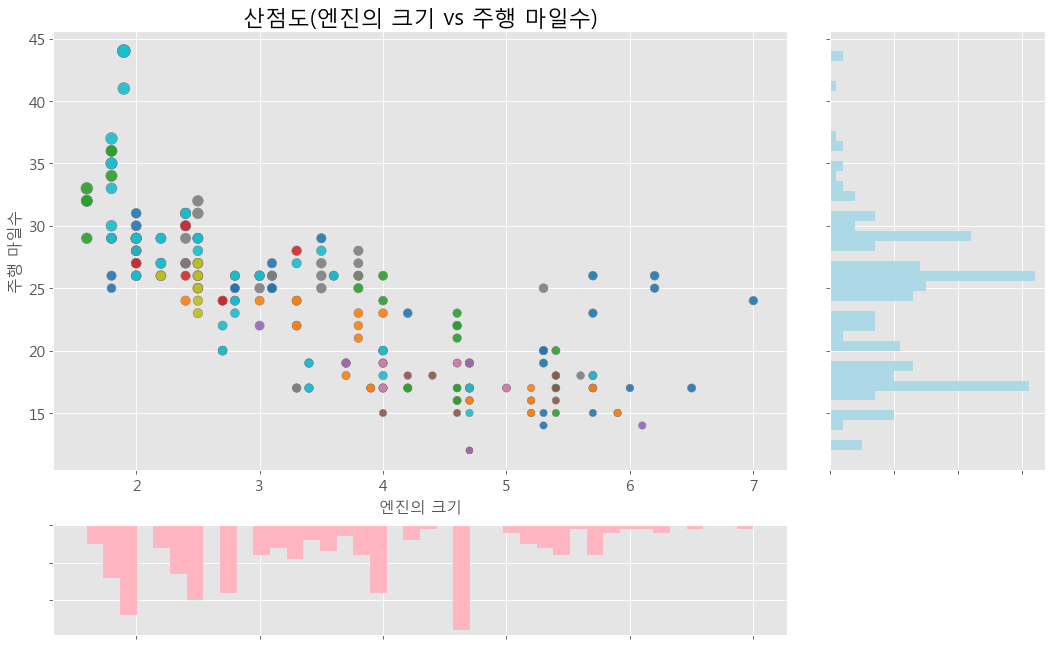

In [41]:
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# 축을 정의합니다.
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# 메인 그래프에 산점도를 그립니다.
ax_main.scatter('displ', 'hwy', s=mpg.cty*4, c=mpg.manufacturer.astype('category').cat.codes, 
                alpha=.9, data=mpg, cmap="tab10", edgecolors='gray', linewidths=.5)

# 하단의 histogram
ax_bottom.hist(mpg.displ, 40, histtype='stepfilled', orientation='vertical', color='lightpink')
ax_bottom.invert_yaxis()

# 오른쪽 histogram
ax_right.hist(mpg.hwy, 40, histtype='stepfilled', orientation='horizontal', color='lightblue')

# Decorations
ax_main.set(title='산점도(엔진의 크기 vs 주행 마일수)', xlabel='엔진의 크기', ylabel='주행 마일수')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

In [40]:
xlabels = ax_main.get_xticks().tolist()
xlabels

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [19]:
diamond_file = './../data/diamonds.csv'
diamonds = pd.read_csv(diamond_file)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [20]:
# 데이터가 매우 커서 전체의 일부분만 샘플링합니다.
FRACTION = 0.005
diamonds = diamonds.sample(frac=FRACTION)

In [21]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [22]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.776704,61.793704,57.294444,3857.488889,5.665889,5.672926,3.504037
std,0.479340,1.197145,2.376497,3936.616272,1.137337,1.130421,0.706519
min,0.230000,57.400000,53.000000,431.000000,3.850000,3.910000,2.430000
25%,0.380000,61.100000,56.000000,943.250000,4.635000,4.652500,2.862500
50%,0.630000,61.800000,57.000000,2073.000000,5.550000,5.545000,3.410000
75%,1.057500,62.500000,58.000000,5385.750000,6.550000,6.547500,4.057500
max,3.010000,66.100000,69.000000,18710.000000,9.410000,9.320000,5.590000


In [23]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
25964,2.53,Premium,H,SI2,61.1,57.0,15148,8.82,8.76,5.37
22921,1.25,Very Good,G,VVS1,60.6,60.0,10962,6.92,6.95,4.20
41309,0.50,Very Good,F,SI1,60.2,62.0,1213,5.10,5.13,3.08
13766,1.04,Premium,E,SI1,62.2,56.0,5612,6.56,6.49,4.06
34638,0.31,Ideal,E,VS2,61.8,55.0,872,4.39,4.35,2.70


In [24]:
xdata = diamonds['price'] # x축
ydata = diamonds['depth'] # y축
table = diamonds['table']  # 원의 크기

In [25]:
table.max()

69.0

In [26]:
table.min()

53.0

In [27]:
mycolor = ['r', 'g', 'b', 'y', 'm']
cut_list = diamonds['cut'].unique()
cut_list

array(['Premium', 'Very Good', 'Ideal', 'Fair', 'Good'], dtype=object)

In [28]:
cut_dict = {cut_list[idx]:mycolor[idx] for idx in range(len(cut_list))}
cut_dict

{'Premium': 'r', 'Very Good': 'g', 'Ideal': 'b', 'Fair': 'y', 'Good': 'm'}

In [29]:
def recode_cut(cut):
    return cut_dict[cut]

In [30]:
# 문자열 데이터를 숫자형으로 변환
diamonds['newcut'] = diamonds['cut'].apply(recode_cut)
newcut = diamonds['newcut'] # 범주형 자료(숫자형)

In [31]:
def recode_table(table):
    if table >= 60:
        return 100
    elif table >= 58:
        return 30
    elif table >= 54:
        return 5
    else :
        return 1

In [32]:
diamonds['newtable'] = diamonds['table'].apply(recode_table)
newtable = diamonds['newtable'] # 범주형 자료(숫자형)

In [33]:
# xdata
# depth
# table
# diamonds['newcut']

In [34]:
diamonds.loc[:, ['price', 'depth', 'newtable', 'table', 'newcut']]

,price,depth,newtable,table,newcut
25964,15148,61.1,5,57.0,r
22921,10962,60.6,100,60.0,g
41309,1213,60.2,100,62.0,g
13766,5612,62.2,5,56.0,r
34638,872,61.8,5,55.0,b
...,...,...,...,...,...
40881,1176,62.2,5,56.0,b
36015,921,61.5,5,57.0,b
45497,1680,60.0,100,61.5,g
34643,872,61.6,5,57.0,b


Text(0, 0.5, 'Depth')

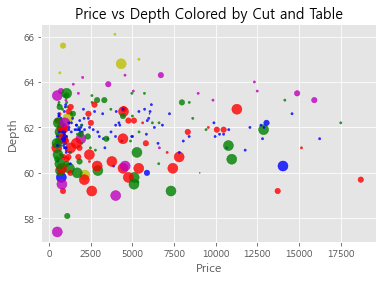

In [39]:
import matplotlib.pyplot as plt
scatter_plot = plt.figure()
ax1 = scatter_plot.add_subplot(1, 1, 1)

# 매개 변수
# 's'는 도형의 크기를 지정합니다.
# 'c'는 색상 이름 또는 숫자의 연속형이면 됩니다.
ax1.scatter(x=xdata, y=ydata, s=newtable, c=newcut, alpha=0.8)

ax1.set_title('Price vs Depth Colored by Cut and Table')
ax1.set_xlabel('Price')
ax1.set_ylabel('Depth')